# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df1 = pd.read_csv(adultDataSet_filename)
df2 = pd.read_csv(airbnbDataSet_filename)
df = pd.read_csv(WHRDataSet_filename)
df4 = pd.read_csv(bookReviewDataSet_filename)

print(df.shape)
df.head(15)

(1562, 19)


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

In [3]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

1. I have chosen to use the World Happiness Record Data, "WHR2018Chapter2OnlineData".
2. I will be predicting the "Life Ladder," which is essentially a measure a population's satisfaction with their life and well-being. A higher score of life ladder incdicates a more satisfied population.
3. This is a supervised learning, regression problem since I will be predicting numerical values for the label based on its features..
4. The features I plan on using include [country, year, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality]
I am making sure not to use features such as 'Standard deviation/Mean of ladder by country-year' as this could cause feature leakage.
6. This is an important machine learning model because governments and policy makers could use this model to create targeted projects to increase the public's satsifaction. This model can also be used to observe the correlation between a country's governing style and public satisfaction. Another example is using the model to find the correlation between the general public's health and their predicted happiness score.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. Data preparation Techniques
2. I will be using a neural network model
3. The evaluation metrics I will be looking at will be accuracy?

In [4]:
np.sum(df.isnull())

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

Looking at the above values show us the number of null values in each column. The last 3 columns have several null values that it is probably best to not include them as features at all. Thus we will drop them.

In [5]:
# Feature Engineering: Feature Selection
features = [
    'country',
    'year',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect',
    'Confidence in national government',
    'Democratic Quality',
    'Delivery Quality'
]

In [6]:
# Making sure our label 'Life Ladder' only has values between 0 and 10
print("Max = ")
print(df['Life Ladder'].max())
print("Min")
print(df['Life Ladder'].min())

# Gives us the correlation of each feature with one another
df.corr()['Life Ladder']

Max = 
8.01893425
Min
2.66171813


year                                                       -0.014505
Life Ladder                                                 1.000000
Log GDP per capita                                          0.779476
Social support                                              0.700299
Healthy life expectancy at birth                            0.729852
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
Perceptions of corruption                                  -0.425013
Positive affect                                             0.554462
Negative affect                                            -0.267492
Confidence in national government                          -0.085543
Democratic Quality                                          0.607034
Delivery Quality                                            0.706673
Standard deviation of ladder by country-year               -0.154257
Standard deviation/Mean of ladder 

In [7]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [8]:
df_copy = df
y = df['Life Ladder'] # Label that we will be predicting
df = df[features] # Features to inlclude
X = df
df.columns

Index(['country', 'year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality'],
      dtype='object')

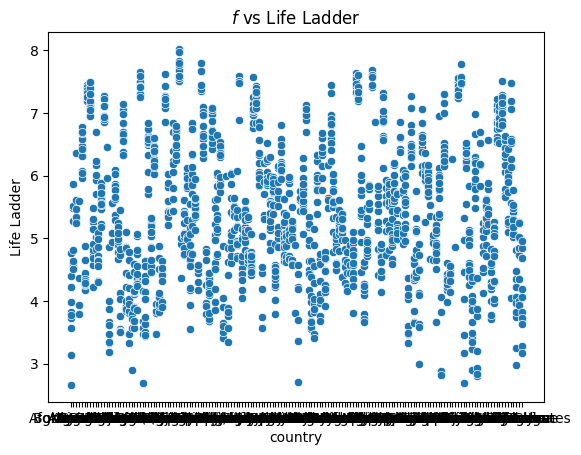

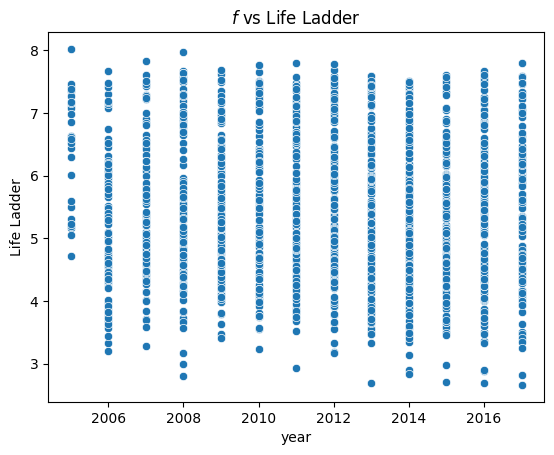

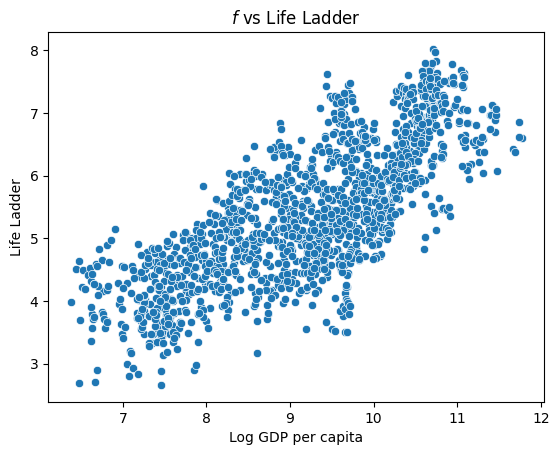

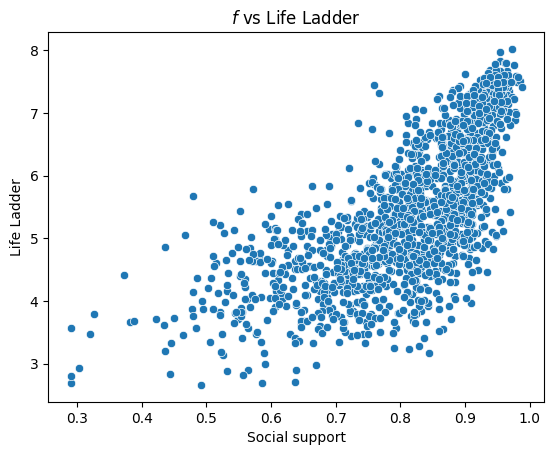

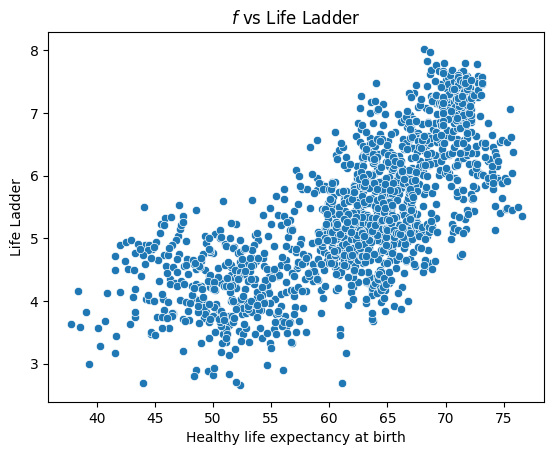

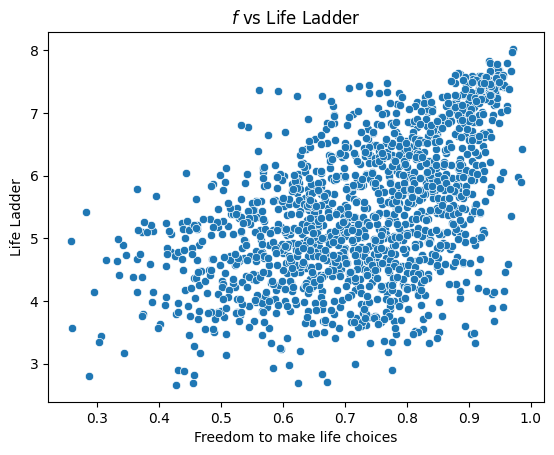

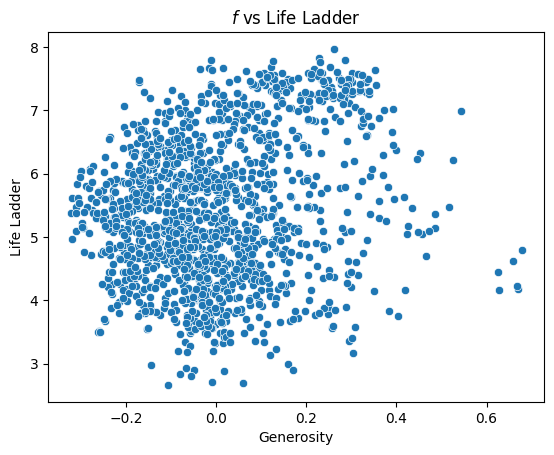

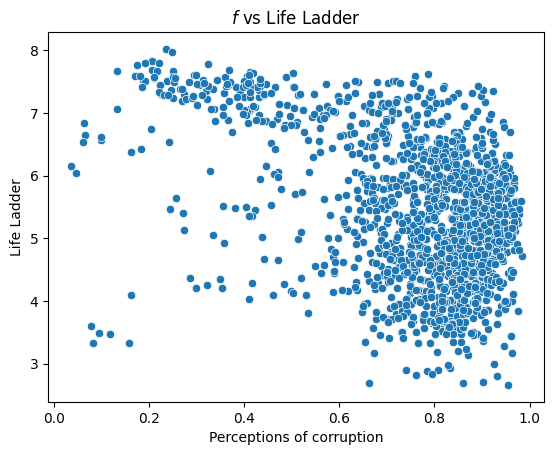

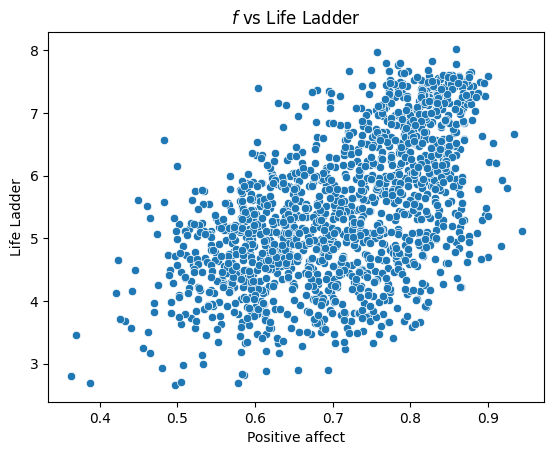

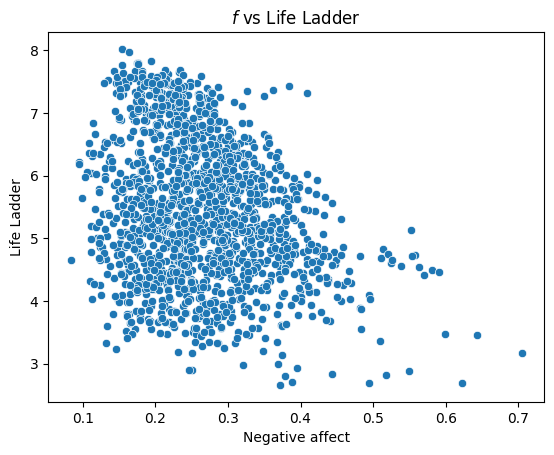

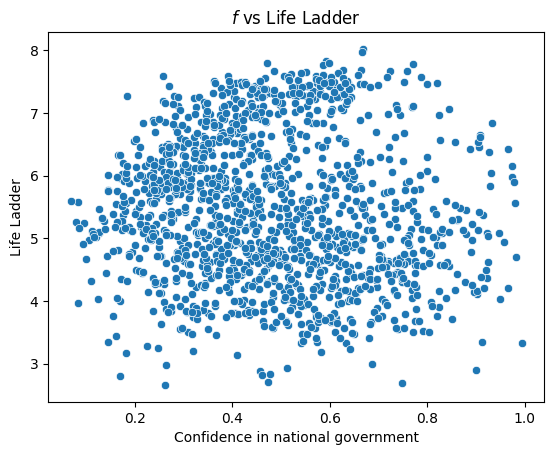

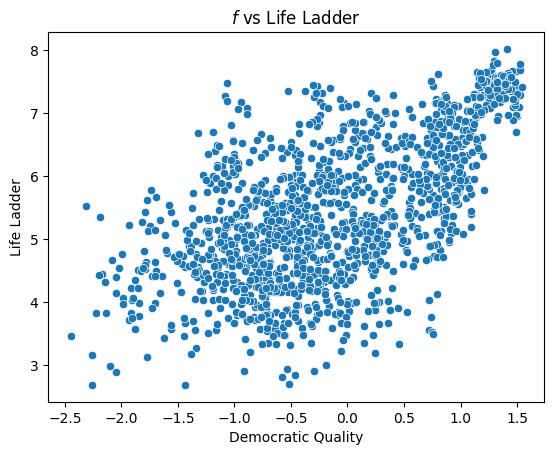

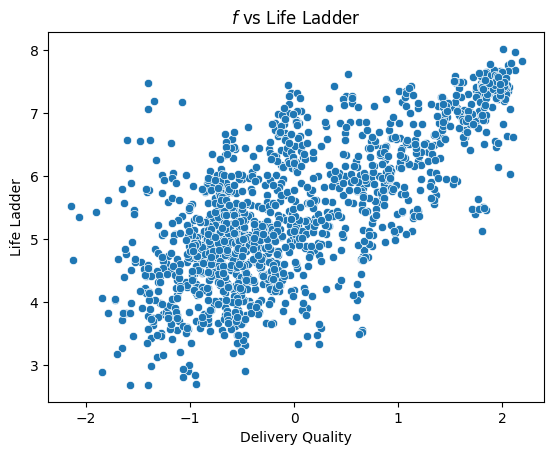

In [10]:
# We can also observe whether a feature contains any outliers:
fig = plt.figure()
ax = fig.add_subplot(111)

for f in df.columns:
    sns.scatterplot(x=df[f], y=y)

    plt.title('${f}$ vs Life Ladder')
    ax.set_xlabel(f)
    ax.set_ylabel('Life Ladder')
    plt.show()

In [10]:
X.dtypes

country                               object
year                                   int64
Log GDP per capita                   float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
Democratic Quality                   float64
Delivery Quality                     float64
dtype: object

The above code shows us that all of our features except the country and year is in the correct numerical, float format. The below code checks to see if we want to discard the country feature or whether we want to use feature transformation techniques to convert the categorical data into numerical features.

In [11]:
print(df_copy['country'].unique().shape)
df_copy['country'].unique()

(164,)


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kaza

Above, we can wee that there are 168 countries recorded, which I will not transform to categorical data as there are too many countries, unsuitable for this project. Alternatively, for future applications, these countries could be classified by which region of the world they are in instead. To deal with the year type, I am choosing to discard the 'year' feature since the value of the years is not very indicative of the actual meaning of the year.

In [12]:
features = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect',
    'Confidence in national government',
    'Democratic Quality',
    'Delivery Quality'
]
df = df[features] # New features to inlclude
X = df

We will now be renaming column names to be more concise and simpler.

In [13]:
new_names_dict = {'Log GDP per capita': 'LogGDP', # Log of GDP per capita
            'Social support': 'Support', # Support from communities around each individual
            'Healthy life expectancy at birth': 'Life Expectancy',
            'Freedom to make life choices': 'Freedom', # Public freedom
            'Perceptions of corruption': 'Corruption', # Public perception of corruption
            'Positive affect': 'Positivity', # Positive emotions experienced
            'Negative affect': 'Negativity', # Negative emotions experienced
            'Confidence in national government': "Gov't Confidence", # Confidence in government
            'Democratic Quality': 'Democracy',
            'Delivery Quality': 'Delivery' # Indicates quality of service
                 }
df = df.rename(columns=new_names_dict) 
# df.set_index('country', inplace=True) # Sets the indices to be country name instead of numerical values
df.head()

,LogGDP,Support,Life Expectancy,Freedom,Generosity,Corruption,Positivity,Negativity,Gov't Confidence,Democracy,Delivery
0,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

- After looking at the data types and null values, I am deciding to get rid of the 'country' and 'year' features.
- For my data preparation, I will get rid of columns that have too many null values. For the rest, I will replace the null values with the numerical mean of the rest of the values of that feature.
- I am deciding to do a decision tree model and will perform grid search to find the most optimal parameters for min_samples_leaf and max_depth parameters.
- I am implementing the GridSearchCV from SciKit Learn to find which decision tree to implement finally.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
import scipy.stats as stats
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import time
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages

2024-08-03 06:02:44.295497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-03 06:02:44.295529: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
# Feature Engineering: Feature Transformation
# Dealing with missing values and outliers

# In order to deal with outliers, I will use the winsorization method to make the outliers less 
# extreme. To deal with missing values, I will replace the null values with the mean of the rest
# of the values of that feature.

In [16]:
# To deal with outliers:
for f in df.columns:
    df[f+'_winsorize'] = stats.mstats.winsorize(df[f], limits=[0.01, 0.01])
    df = df.drop(columns=f)

In [17]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

LogGDP_winsorize               27
Support_winsorize               0
Life Expectancy_winsorize       0
Freedom_winsorize              29
Generosity_winsorize           80
Corruption_winsorize           90
Positivity_winsorize           18
Negativity_winsorize            0
Gov't Confidence_winsorize    161
Democracy_winsorize           171
Delivery_winsorize            171
dtype: int64

The above code notes which columns contain null values.

In [18]:
null_columns = nan_count[nan_count!=0].index
null_columns

Index(['LogGDP_winsorize', 'Freedom_winsorize', 'Generosity_winsorize',
       'Corruption_winsorize', 'Positivity_winsorize',
       'Gov't Confidence_winsorize', 'Democracy_winsorize',
       'Delivery_winsorize'],
      dtype='object')

In [35]:
# Calculate mean for each feature column and then use fillna() method to fill null values 
# with calculated mean
for n in null_columns:
    mean = df[n].mean()
    df[n].fillna(mean, inplace=True)

In [36]:
# The following line checks to see if there are any remaining null values
# The value returned should bbe false
df.isnull().values.any()

False

In [37]:
df.head()

,LogGDP_winsorize_winsorize,Support_winsorize_winsorize,Life Expectancy_winsorize_winsorize,Freedom_winsorize_winsorize,Generosity_winsorize_winsorize,Corruption_winsorize_winsorize,Positivity_winsorize_winsorize,Negativity_winsorize_winsorize,Gov't Confidence_winsorize_winsorize,Democracy_winsorize_winsorize,Delivery_winsorize_winsorize
0,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.642179
1,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.017452,-1.635025
2,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [38]:
# Model 1: Neural Network Model
# Model 2: KNN Model
# Model 3: Decision Tree Model
# Model 4: Random Forest??
df.shape

(1562, 11)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
# Checking to see that all data types are numerical
print(X_train.dtypes)

(1171, 11)
Log GDP per capita                   float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
Democratic Quality                   float64
Delivery Quality                     float64
dtype: object


# Performing Grid Search on Decision Trees

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Create a range of possible values for 'max_depth'
depth_values = [2**n for n in range(2,6)]

# Create a range of hyperparameter values for 'min_samples_leaf'. 
leaf_values = [n for n in range(1,50)]

# Create parameter grid.
param_grid={'max_depth':depth_values, 'min_samples_leaf':leaf_values}
param_grid

{'max_depth': [4, 8, 16, 32],
 'min_samples_leaf': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49]}

In [42]:
print('Running Grid Search...')

# Create a DecisionTreeRegressor object
model = DecisionTreeRegressor()
 
# Run a Grid Search with 5-fold cross-validation using the model.
grid = GridSearchCV(model, param_grid, cv=5)

# 3. Fit the model on the training data and assign the fitted model to the variable grid_search
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [43]:
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))

Optimal hyperparameters: {'max_depth': 32, 'min_samples_leaf': 8}


In [44]:
print('Best Score: {0}'.format(grid_search.best_score_))

Best Score: 0.7942731101139582


# Making the Final Decision Tree

In [60]:
# Creating a DecionTreeRegressor object
dt_model = DecisionTreeRegressor(criterion='squared_error', max_depth=32, min_samples_leaf=8, random_state=123)

# Fitting the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions
num_predictions = dt_model.predict(X_test)

dt_loss = mean_squared_error(y_test, num_predictions)

print(pd.DataFrame(dt_model.feature_importances_))
print("Loss = ")
print(dt_loss)

           0
0   0.544936
1   0.033747
2   0.219713
3   0.005207
4   0.011886
5   0.012228
6   0.088506
7   0.006909
8   0.020851
9   0.039317
10  0.016701
Loss = 
0.276584903984286


<AxesSubplot: >

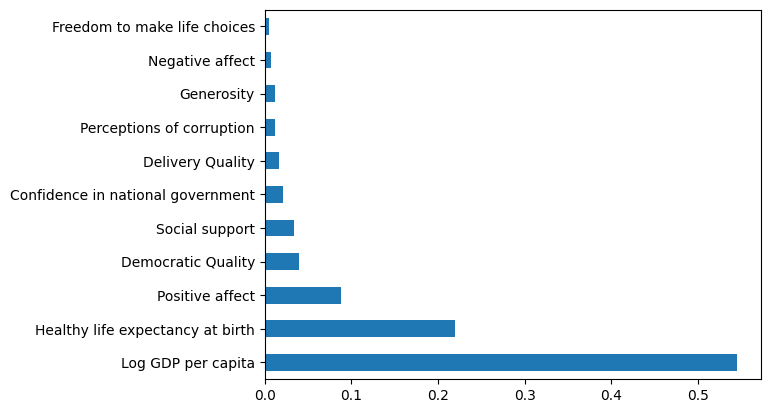

In [64]:
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

The above graph shows us the feature importances of our final features based on the decision tree model made. These feature importances can help us derive relationships between the features in our dataset and a country's predicted happiness.

Here is the link to my GitHub: https://github.com/grish-ma/MyPortfolio-24

For Lab 8b, my Lab 8a files will be in the folder called ML_Files.